# Content
* [1. Data Summary](#1)
* [2. Logit Regression for one variable](#2)
   * [2.1 Default vs Credit score](#2.1)
   * [2.2 Deal vs Credit score](#2.2)
   * [2.3 Deal vs Contact](#2.3)
   * [2.4 logistic regression with multiple variables](#2.4)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import statsmodels.formula.api as smf

<a id="1"></a>
## 1.Data Summary

In [5]:
data = pd.read_csv(r"C:\Users\15161\Jupyter_git\Fin-Tech\Assignment1\Input\MDS6212 Week 1 Data.csv",encoding="gbk")
data.head()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\parsers.py:1848: RuntimeWarning: divide by zero encountered in equal
  data = self._reader.read(nrows)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:5774: RuntimeWarning: divide by zero encountered in equal
  if (indexer == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1619: RuntimeWarning: divide by zero encountered in equal
  mask = indexer == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-package

,uid,id,provincecode,birthday,age,gender,areaid,provincename,cityname,areaname,...,highcontact,highcontact20s,numbercontacttotal,default_firstmonth_0,default_firstmonth_30,default_firstmonth_60,delaydate_max,default_max_0,default_max_30,default_max_60
0,72146187,1200345737,43,19951203,24,False,431222,湖南省,怀化市,沅陵县,...,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101101513,1200456775,32,19880607,31,False,320382,江苏省,徐州市,邳州市,...,True,True,47,False,False,False,-3.0,False,False,False
2,98608810,1200502203,42,19960503,23,False,420821,湖北省,荆门市,京山县,...,True,True,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96300664,1200424426,51,20000620,19,True,510824,四川省,广元市,苍溪县,...,False,False,0,False,False,False,-23.0,False,False,False
4,105585598,1200512684,32,19940122,25,False,321324,江苏省,宿迁市,泗洪县,...,True,True,46,False,False,False,0.0,False,False,False


In [6]:
data.shape

(5000, 47)

In [7]:
data.info()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\generic.py:1143: RuntimeWarning: divide by zero encountered in invert
  arr = operator.inv(com._values_from_object(self))
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\nanops.py:714: RuntimeWarning: divide by zero encountered in subtract
  null_mask = (mask.shape[axis] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 47 columns):
uid                      5000 non-null int64
id                       5000 non-null int64
provincecode             5000 non-null int64
birthday                 5000 non-null int64
age                      5000 non-null int64
gender                   5000 non-null bool
areaid                   5000 non-null int64
provincename             3164 non-null object
cityname                 3163 non-null object
areaname                 3163 non-null object
instalments_num          5000 non-null int64
instalments_amount       5000 non-null int64
shop_address             5000 non-null object
trans_date               4996 non-null object
taobaostartdate          3794 non-null object
taobaoenddate            3907 non-null object
taobaodealno             5000 non-null int64
apptimes                 5000 non-null int64
deal                     5000 non-null int64
apply_request_sum        5000 no

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\frame.py:2239: RuntimeWarning: divide by zero encountered in true_divide
  num /= 1024.0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\frame.py:2239: RuntimeWarning: divide by zero encountered in double_scalars
  num /= 1024.0


In [8]:
## Convert gender to 0/1
data["gender"][data["gender"]==False] = 0
data["gender"][data["gender"]==True] = 1

C:\Users\15161\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:336: RuntimeWarning: divide by zero encountered in invert
  return ~res
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:952: RuntimeW

In [9]:
#age, gender, loan amount, interest rate, credit scores
data[["age","gender","instalments_amount","nominalrates","creditlevelasbuyer"]].describe()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\p

,age,gender,instalments_amount,nominalrates,creditlevelasbuyer
count,5000.000000,5000.000000,5000.00000,4997.000000,4031.000000
mean,27.675400,0.146600,406201.42000,0.276058,53.119077
std,8.326146,0.353742,130623.36024,0.085912,108.629757
min,18.000000,0.000000,50000.00000,0.130080,0.000000
25%,21.000000,0.000000,320000.00000,0.204560,0.000000
50%,25.000000,0.000000,398000.00000,0.204579,14.000000
75%,32.000000,0.000000,498000.00000,0.359347,58.000000
max,56.000000,1.000000,869000.00000,0.494185,1830.000000


In [10]:
data["gender"].value_counts()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1048: RuntimeWarning: divide by zero encountered in invert
  imask = (~mask).ravel()
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1084: RuntimeWarning: divide by zero encountered in absolute
  abs_vals = np.abs(self.values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1088: RuntimeWarning: divide by zero encountered in greater
  has_large_values = (abs_vals > 1e6).any()
C:\Users\15161\Anaconda3\lib

0.0    4267
1.0     733
Name: gender, dtype: int64

In [11]:
data.describe()

C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1217: RuntimeWarning: divide by zero encountered in greater_equal
  if not is_numeric_dtype(percentiles) or not np.all(percentiles >= 0) \
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: divide by zero encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1218: RuntimeWarning: divide by zero encountered in less_equal
  or not np.all(percentiles <= 1):
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1221: RuntimeWarning: divide by zero encountered in multiply
  percentiles = 100 * percentiles
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1222: RuntimeWarning: divide by zero 

,uid,id,provincecode,birthday,age,gender,areaid,instalments_num,instalments_amount,taobaodealno,...,yuebaobalance,huabeiamount,huabeibalance,creditlevelasbuyer,tencentscore,gaodescore,numbercontact,numbercontact20s,numbercontacttotal,delaydate_max
count,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,...,5000.000000,5000.000000,5000.000000,4031.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2205.000000
mean,8.111683e+07,1.200468e+09,39.484000,1.991392e+07,27.675400,0.146600,396256.327200,11.900400,406201.42000,168.486600,...,429.160542,1308.978800,582.872618,53.119077,58.608168,0.201975,8.713000,7.092600,105.608800,153.494785
std,2.836443e+07,7.706665e+04,11.870785,8.325553e+04,8.326146,0.353742,118965.023693,0.766679,130623.36024,4467.552233,...,5611.936957,2497.842373,1774.035677,108.629757,14.218112,0.076724,23.833511,17.961619,234.927488,357.255584
min,1.812700e+04,1.200146e+09,11.000000,1.963020e+07,18.000000,0.000000,110101.000000,6.000000,50000.00000,0.000000,...,0.000000,0.000000,-6031.710000,0.000000,9.000000,0.023518,0.000000,0.000000,0.000000,-31.000000
25%,6.425284e+07,1.200404e+09,33.000000,1.987082e+07,21.000000,0.000000,330326.750000,12.000000,320000.00000,2.000000,...,0.000000,0.000000,0.000000,0.000000,53.888889,0.192094,0.000000,0.000000,0.000000,0.000000
50%,9.233801e+07,1.200470e+09,37.000000,1.994030e+07,25.000000,0.000000,371316.500000,12.000000,398000.00000,34.000000,...,0.000000,500.000000,3.075000,14.000000,60.200000,0.192094,3.000000,3.000000,47.000000,0.000000
75%,1.030515e+08,1.200533e+09,51.000000,1.998062e+07,32.000000,0.000000,510725.000000,12.000000,498000.00000,80.000000,...,2.932500,1500.000000,425.752500,58.000000,65.258929,0.192094,10.000000,8.000000,115.000000,6.000000
max,1.128031e+08,1.200601e+09,65.000000,2.001093e+07,56.000000,1.000000,659001.000000,12.000000,869000.00000,270504.000000,...,272288.550000,38000.000000,28551.800000,1830.000000,98.000000,0.732120,1169.000000,751.000000,4964.000000,1000.000000


In [12]:
data.corr()['deal'].sort_values()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\frame.py:6507: RuntimeWarning: divide by zero encountered in isfinite
  correl = libalgos.nancorr(_ensure_float64(mat), minp=min_periods)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\151

tencentscore         -0.213409
gaodescore           -0.105925
instalments_amount   -0.096088
id                   -0.071709
apply_request_sum    -0.065933
apply_reject_sum     -0.062687
age                  -0.056150
loan_offer_sum       -0.032331
areaid               -0.031990
provincecode         -0.031802
repay_fail_sum       -0.019168
instalments_num      -0.004299
taobaodealno          0.002084
numbercontacttotal    0.005232
numbercontact20s      0.018830
numbercontact         0.022857
delaydate_max         0.025641
max_default_days      0.035355
highcontact20s        0.035964
yuebaobalance         0.040148
alipaybalance         0.040259
highcontact           0.041664
birthday              0.056075
gender                0.076812
creditlevelasbuyer    0.129605
nominalrates          0.131284
uid                   0.215884
huabeibalance         0.231817
huabeiamount          0.231949
apptimes              0.237908
deal                  1.000000
Name: deal, dtype: float64

In [13]:
data['default'].value_counts(dropna=False)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad


NaN      2795
False    1280
True      925
Name: default, dtype: int64

In [14]:
data['deal'].value_counts(dropna=False)

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


0    2793
1    2207
Name: deal, dtype: int64

In [15]:
data['highcontact'].value_counts(dropna=False)

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:336: RuntimeWarning: divide by zero encountered in invert
  return ~res
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:952: RuntimeWarning: divide by zero encountered in bitwise_and
  is_float_type = lib.map_infer(vals, is_float) & notna(vals)


False    2539
True     2461
Name: highcontact, dtype: int64

In [16]:
pd.get_dummies(data,columns=["highcontact","deal"])

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in bitwise_or
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\si

,uid,id,provincecode,birthday,age,gender,areaid,provincename,cityname,areaname,...,default_firstmonth_30,default_firstmonth_60,delaydate_max,default_max_0,default_max_30,default_max_60,highcontact_False,highcontact_True,deal_0,deal_1
0,72146187,1200345737,43,19951203,24,0.0,431222,湖南省,怀化市,沅陵县,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0
1,101101513,1200456775,32,19880607,31,0.0,320382,江苏省,徐州市,邳州市,...,False,False,-3.0,False,False,False,0,1,0,1
2,98608810,1200502203,42,19960503,23,0.0,420821,湖北省,荆门市,京山县,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0
3,96300664,1200424426,51,20000620,19,1.0,510824,四川省,广元市,苍溪县,...,False,False,-23.0,False,False,False,1,0,0,1
4,105585598,1200512684,32,19940122,25,0.0,321324,江苏省,宿迁市,泗洪县,...,False,False,0.0,False,False,False,0,1,0,1
5,85866700,1200552120,32,19980907,21,0.0,320321,江苏省,徐州市,丰县,...,False,False,-11.0,False,False,False,1,0,0,1
6,111173970,1200574366,32,19980818,21,0.0,320321,江苏省,徐州市,丰县,...,False,False,-6.0,False,False,False,1,0,1,0
7,92046256,1200427496,15,19940422,25,1.0,152627,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0
8,112614401,1200597146,32,19710416,48,0.0,320723,江苏省,连云港市,灌云县,...,False,False,0.0,False,False,False,1,0,0,1
9,95775332,1200419765,50,19991001,20,0.0,500235,重庆市,重庆市,云阳县,...,False,False,0.0,False,False,False,0,1,0,1


In [17]:
data.corr()['creditlevelasbuyer'].sort_values()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\frame.py:6507: RuntimeWarning: divide by zero encountered in isfinite
  correl = libalgos.nancorr(_ensure_float64(mat), minp=min_periods)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\151

tencentscore         -0.187269
gaodescore           -0.152636
areaid               -0.081376
provincecode         -0.080796
uid                  -0.066306
age                  -0.052439
max_default_days     -0.043282
delaydate_max        -0.031309
instalments_num      -0.020504
nominalrates          0.006458
id                    0.007998
highcontact           0.018981
highcontact20s        0.022421
apptimes              0.031294
yuebaobalance         0.031996
alipaybalance         0.034487
numbercontact20s      0.042521
taobaodealno          0.043939
numbercontact         0.049428
birthday              0.052443
apply_reject_sum      0.064167
apply_request_sum     0.077006
numbercontacttotal    0.092044
instalments_amount    0.101911
deal                  0.129605
repay_fail_sum        0.134941
loan_offer_sum        0.160636
gender                0.218806
huabeibalance         0.287538
huabeiamount          0.503977
creditlevelasbuyer    1.000000
Name: creditlevelasbuyer, dtype: float6

In [18]:
data[["gaodescore","tencentscore","huabeiamount","huabeibalance","gender"]].describe()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in bitwise_or
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\si

,gaodescore,tencentscore,huabeiamount,huabeibalance,gender
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.201975,58.608168,1308.978800,582.872618,0.146600
std,0.076724,14.218112,2497.842373,1774.035677,0.353742
min,0.023518,9.000000,0.000000,-6031.710000,0.000000
25%,0.192094,53.888889,0.000000,0.000000,0.000000
50%,0.192094,60.200000,500.000000,3.075000,0.000000
75%,0.192094,65.258929,1500.000000,425.752500,0.000000
max,0.732120,98.000000,38000.000000,28551.800000,1.000000


In [19]:
clf = LinearRegression()
Y = data["creditlevelasbuyer"][data["creditlevelasbuyer"].notnull()]
X = data[["gaodescore","tencentscore","huabeiamount","huabeibalance"]][data["creditlevelasbuyer"].notnull()]
clf.fit(X,Y)

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\generic.py:1143: RuntimeWarning: divide by zero encountered in invert
  arr = operator.inv(com._values_from_object(self))
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\s

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
clf.score(X,Y)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:241: RuntimeWarning: divide by zero encountered in add
  dense_output=True) + self.intercept_
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:538: RuntimeWarning: divide by zero encoun

0.2824682762425156

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:241: RuntimeWarning: divide by zero encountered in add
  dense_output=True) + self.intercept_
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\figure.py:356: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(figsize).all():
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\gridspec.py:134: RuntimeWarning: divide by zero encountered in

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2495: RuntimeWarning: divide by zero encountered in isfinite
  finite_dl = [d for d in dl if np.isfinite(d).all()]
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2500: RuntimeWarning: divide by zero encountered in isfinite
  if (np.isfinite(d.intervalx).all() and
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2503: RuntimeWarning: divide by zero encountered in isfinite
  if (np.isfinite(d.intervaly).all() and
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\transforms.py:2943: RuntimeWarning: divide by zero encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\numeric.py:2363: RuntimeWarning: divide by zero encountered in isfinite
  xfin = isfinite(x)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\numeric.py:2364: RuntimeWarning: divide by zero encountered in isfinite
  yfin = isfinite(y)
C:\Use

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2507: RuntimeWarning: divide by zero encountered in double_scalars
  return int(np.floor(length / size))
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2507: RuntimeWarning: divide by zero encountered in floor
  return int(np.floor(length / size))
C:\Users\15161\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:191: RuntimeWarning: divide by zero encountered in greater
  return rgbaArr[:,:3].dot((.299, .587, .114)) > .5
C:\Users\15161\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:180: RuntimeWarning: divide by zero encountered in equal
  if ticksLight.size and (ticksLight == ticksLight[0]).all():
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\transforms.py:434: RuntimeWarning: divide by zero encountered in subtract
  return points[1] - points[0]
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\figure.py:907: RuntimeWarning: divide by zero encountered in isfinite
  if not

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2226: RuntimeWarning: divide by zero encountered in double_scalars
  dy = abs(ptp[1] - where)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\text.py:376: RuntimeWarning: divide by zero encountered in double_scalars
  offsetx = (xmin + width)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\text.py:387: RuntimeWarning: divide by zero encountered in double_scalars
  offsety = ymin + height - baseline / 2.0
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2289: RuntimeWarning: divide by zero encountered in double_scalars
  (left - self.labelpad * self.figure.dpi / 72.0, y)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2315: RuntimeWarning: divide by zero encountered in double_scalars
  (x, top + self.OFFSETTEXTPAD * self.figure.dpi / 72.0)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:614: RuntimeWarning: divide by zero encountered in double_scalars
  return mtransf

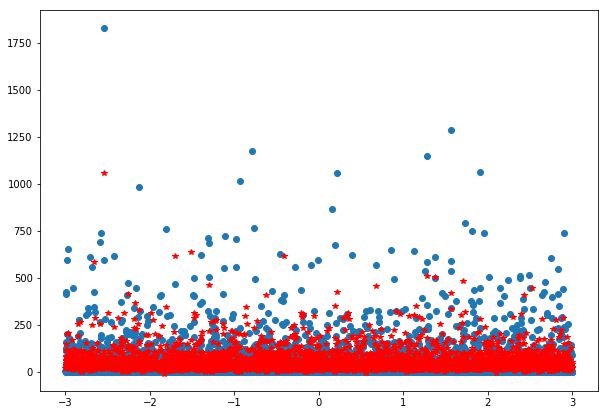

In [21]:
x = np.random.uniform(-3,3,size=len(Y))
y_pre = clf.predict(X)
plt.figure(figsize=[10, 7])
plt.scatter(x,Y)
plt.plot(x,y_pre,"r*")
plt.show()

In [22]:
data["credit_reg"] =data["creditlevelasbuyer"]

In [48]:
X_P = data[["gaodescore","tencentscore","huabeiamount","huabeibalance"]][data["creditlevelasbuyer"].isnull()]
data["credit_reg"][data["creditlevelasbuyer"].isnull()] = clf.predict(X_P)

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in bitwise_or
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\si

In [94]:
## Using poly regression to fill na value in credit score
# model = Pipeline(
# [
#     ('poly',PolynomialFeatures(degree=3)),
#     ('linear',LinearRegression(fit_intercept=False))
# ]
# )
# model =model.fit(X,Y)


In [95]:
# model.score(X,Y)

0.3218163393190985

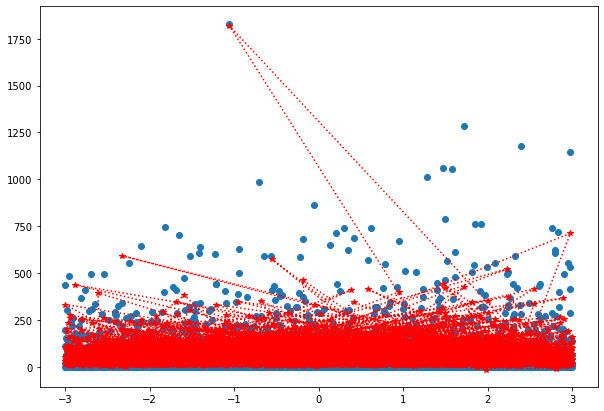

In [96]:
# x = np.random.uniform(-3,3,size=len(Y))
# y_pre = model.predict(X)
# plt.figure(figsize=[10, 7])
# plt.scatter(x,Y)
# plt.plot(x,y_pre,"r:*")
# plt.show()

<a id="2"></a>
## 2Logit Regression

<a id="2.1"> </a>
### 2.1 Default vs Credit score

In [25]:
## Convert default to 0/1
data["default"][data["default"]==False] = 0
data["default"][data["default"]==True] = 1

C:\Users\15161\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:336: RuntimeWarning: divide by zero encountered in invert
  return ~res
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:952: RuntimeW

In [26]:
data['default'].value_counts(dropna=False)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1048: RuntimeWarning: divide by zero encountered in invert
  imask = (~mask).ravel()
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1084: RuntimeWarning: divide by zero encountered in absolute
  abs_vals = np.abs(self.values)
C:\Users\15161\Anaconda3\lib\sit

NaN     2795
 0.0    1280
 1.0     925
Name: default, dtype: int64

In [27]:
## drop null value records in default since it is the target variables
data_default = data[data['default'].notnull()]
data_default.shape

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\generic.py:1143: RuntimeWarning: divide by zero encountered in invert
  arr = operator.inv(com._values_from_object(self))
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in bitwise_or
  mask = (indices >= n) | (indices < 0)


(2205, 48)

In [28]:
##There is null in data
data_default['creditlevelasbuyer'].value_counts(dropna=False)

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1048: RuntimeWarning: divide by zero encountered in invert
  imask = (~mask).ravel()
C:\Users\15161\Anaconda3\lib\site-packag

NaN        354
 0.0       345
 1.0        69
 2.0        42
 3.0        40
 9.0        28
 6.0        28
 5.0        26
 10.0       26
 11.0       24
 14.0       23
 4.0        21
 12.0       21
 20.0       21
 26.0       20
 21.0       19
 7.0        19
 47.0       18
 13.0       18
 15.0       18
 23.0       17
 25.0       16
 27.0       16
 16.0       16
 22.0       16
 17.0       15
 28.0       15
 36.0       15
 41.0       14
 32.0       14
          ... 
 265.0       1
 331.0       1
 245.0       1
 479.0       1
 1830.0      1
 230.0       1
 307.0       1
 174.0       1
 300.0       1
 236.0       1
 55.0        1
 117.0       1
 212.0       1
 251.0       1
 201.0       1
 269.0       1
 1015.0      1
 373.0       1
 1283.0      1
 367.0       1
 645.0       1
 159.0       1
 684.0       1
 229.0       1
 382.0       1
 219.0       1
 205.0       1
 258.0       1
 353.0       1
 622.0       1
Name: creditlevelasbuyer, Length: 313, dtype: int64

In [29]:
data_default['creditlevelasbuyer'].value_counts(dropna=False)

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1048: RuntimeWarning: divide by zero encountered in invert
  imask = (~mask).ravel()
C:\Users\15161\Anaconda3\lib\site-packag

NaN        354
 0.0       345
 1.0        69
 2.0        42
 3.0        40
 9.0        28
 6.0        28
 5.0        26
 10.0       26
 11.0       24
 14.0       23
 4.0        21
 12.0       21
 20.0       21
 26.0       20
 21.0       19
 7.0        19
 47.0       18
 13.0       18
 15.0       18
 23.0       17
 25.0       16
 27.0       16
 16.0       16
 22.0       16
 17.0       15
 28.0       15
 36.0       15
 41.0       14
 32.0       14
          ... 
 265.0       1
 331.0       1
 245.0       1
 479.0       1
 1830.0      1
 230.0       1
 307.0       1
 174.0       1
 300.0       1
 236.0       1
 55.0        1
 117.0       1
 212.0       1
 251.0       1
 201.0       1
 269.0       1
 1015.0      1
 373.0       1
 1283.0      1
 367.0       1
 645.0       1
 159.0       1
 684.0       1
 229.0       1
 382.0       1
 219.0       1
 205.0       1
 258.0       1
 353.0       1
 622.0       1
Name: creditlevelasbuyer, Length: 313, dtype: int64

In [30]:
## Fill the void with mean
data_default['creditlevelasbuyer'][data_default['creditlevelasbuyer'].isnull()] = data_default['creditlevelasbuyer'].mean()
## Fill the void with other related variables
# data_default.corr()['creditlevelasbuyer']

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:336: RuntimeWarning: divide by zero encountered in invert
  return ~res
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:952: RuntimeW

In [31]:
## Defin X and Y
Y = data_default['default']
X = np.array(data_default['creditlevelasbuyer']).reshape(-1,1)

In [32]:
Y = Y.astype('int')

In [33]:
lg = LogisticRegression()
lg.fit(X,Y)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:291: RuntimeWarning: divide by zero encountered in subtract
  imask = np.cumsum(mask) - 1
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\svm\base.py:902: RuntimeWarning: divide by zero encountered in multiply
  intercept_ = intercept_scaling * raw_coef_[:, -1]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
lg.score(X,Y)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:308: RuntimeWarning: divide by zero encountered in add
  dense_output=True) + self.intercept_
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:326: RuntimeWarning: divide by zero encountered in greater
  indices = (scores > 0).astype(np.int)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:181: RuntimeWarning: divide by zero en

0.5804988662131519

In [35]:
lg.coef_

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:841: RuntimeWarning: divide by zero encountered in isfinite
  finite_vals = data[isfinite(data)]
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:844: RuntimeWarning: divide by zero encountered in not_equal
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:844: RuntimeWarning: divide by zero encountered in absolute
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:850: RuntimeWarning: divide by zero encountered in double_scalars
  (min_val < 0.0001 or max_val/min_val > 1000.)):
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:924: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(x):


array([[-0.00035496]])

In [36]:
X_sort = data_default['creditlevelasbuyer'].sort_values()
X_sort = np.array(X_sort).reshape(-1,1)

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


In [37]:
P_1 = lg.predict_proba(X_sort)
P_1

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:308: RuntimeWarning: divide by zero encountered in add
  dense_output=True) + self.intercept_
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:339: RuntimeWarning: divide by zero encountered in multiply
  prob *= -1
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: divide by zero encountered in exp
  np.exp(prob, prob)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:341: RuntimeWarning: divide by zero encountered in add
  prob += 1
C:\Users\15161\A

array([[0.57456157, 0.42543843],
       [0.57456157, 0.42543843],
       [0.57456157, 0.42543843],
       ...,
       [0.66987661, 0.33012339],
       [0.68046329, 0.31953671],
       [0.7211283 , 0.2788717 ]])

In [38]:
odds =[]
for i in range(len(P_1)):
    odds.append(P_1[i][1]/P_1[i][0])
odds

C:\Users\15161\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


[0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\figure.py:356: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(figsize).all():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\gridspec.py:134: RuntimeWarning: divide by zero encountered in subtract
  fig_tops, fig_bottoms = (top - cell_hs).reshape((-1, 2)).T
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\gridspec.py:135: RuntimeWarning: divide by zero encountered in add
  fig_lefts, fig_rights = (left + cell_ws).reshape((-1, 2)).T
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: divide by zero encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: divide by zero encountered in

C:\Users\15161\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:191: RuntimeWarning: divide by zero encountered in greater
  return rgbaArr[:,:3].dot((.299, .587, .114)) > .5
C:\Users\15161\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:180: RuntimeWarning: divide by zero encountered in equal
  if ticksLight.size and (ticksLight == ticksLight[0]).all():
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\transforms.py:434: RuntimeWarning: divide by zero encountered in subtract
  return points[1] - points[0]
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\figure.py:907: RuntimeWarning: divide by zero encountered in isfinite
  if not all(np.isfinite(_) for _ in (w, h)):
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\figure.py:917: RuntimeWarning: divide by zero encountered in double_scalars
  canvasw = w * dpival
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\figure.py:918: RuntimeWarning: divide by zero encountered in double_scalars
  ca

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2289: RuntimeWarning: divide by zero encountered in double_scalars
  (left - self.labelpad * self.figure.dpi / 72.0, y)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\text.py:395: RuntimeWarning: divide by zero encountered in double_scalars
  offsetx = (xmin1 + xmax1) / 2.0
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2315: RuntimeWarning: divide by zero encountered in double_scalars
  (x, top + self.OFFSETTEXTPAD * self.figure.dpi / 72.0)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\lines.py:744: RuntimeWarning: divide by zero encountered in int_scalars
  subslice = slice(max(i0 - 1, 0), i1 + 1)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\text.py:385: RuntimeWarning: divide by zero encountered in double_scalars
  offsety = (ymin + height) - baseline
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:614: RuntimeWarning: divide by zero encountered in double_scalars


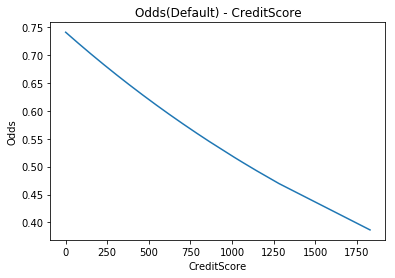

In [39]:
plt.plot(X_sort,odds)
plt.ylabel("Odds")
plt.xlabel("CreditScore")
plt.title("Odds(Default) - CreditScore")
plt.show()

<a id="2.2"> </a>
### 2.2 deal vs Credit score

In [40]:
data['creditlevelasbuyer'].value_counts(dropna=False) ##about 1/10 null value

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1048: RuntimeWarning: divide by zero encountered in invert
  imask = (~mask).ravel()
C:\Users\15161\Anaconda3\lib\site-packag

 0.0      1093
NaN        969
 1.0       178
 2.0       104
 3.0        86
 4.0        67
 5.0        66
 6.0        61
 10.0       55
 14.0       53
 9.0        50
 7.0        48
 11.0       48
 15.0       43
 26.0       39
 12.0       37
 8.0        37
 13.0       37
 16.0       36
 17.0       35
 22.0       34
 21.0       33
 20.0       32
 27.0       32
 23.0       31
 28.0       30
 24.0       29
 33.0       28
 36.0       27
 19.0       27
          ... 
 367.0       1
 549.0       1
 276.0       1
 721.0       1
 687.0       1
 353.0       1
 473.0       1
 197.0       1
 270.0       1
 499.0       1
 361.0       1
 216.0       1
 464.0       1
 168.0       1
 304.0       1
 136.0       1
 272.0       1
 368.0       1
 211.0       1
 305.0       1
 615.0       1
 375.0       1
 684.0       1
 282.0       1
 167.0       1
 347.0       1
 401.0       1
 486.0       1
 266.0       1
 201.0       1
Name: creditlevelasbuyer, Length: 375, dtype: int64

In [41]:
data['creditlevelasbuyer'].describe() ##about 1/10 null value

C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1217: RuntimeWarning: divide by zero encountered in greater_equal
  if not is_numeric_dtype(percentiles) or not np.all(percentiles >= 0) \
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: divide by zero encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1218: RuntimeWarning: divide by zero encountered in less_equal
  or not np.all(percentiles <= 1):
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1221: RuntimeWarning: divide by zero encountered in multiply
  percentiles = 100 * percentiles
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1222: RuntimeWarning: divide by zero 

count    4031.000000
mean       53.119077
std       108.629757
min         0.000000
25%         0.000000
50%        14.000000
75%        58.000000
max      1830.000000
Name: creditlevelasbuyer, dtype: float64

In [42]:
## Fill na
data['credit_score'] = data['creditlevelasbuyer']
data['credit_score'][data['credit_score'].isnull()] = data["credit_score"].mean()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:336: RuntimeWarning: divide by zero encountered in invert
  return ~res
C:\Us

In [43]:
Y2 = data["deal"]
X2 = np.array(data["credit_score"]).reshape(-1,1)

In [44]:
lg2 = LogisticRegression()
lg2.fit(X2,Y2)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:291: RuntimeWarning: divide by zero encountered in subtract
  imask = np.cumsum(mask) - 1
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\svm\base.py:902: RuntimeWarning: divide by zero encountered in multiply
  intercept_ = intercept_scaling * raw_coef_[:, -1]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
lg2.score(X2,Y2)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:308: RuntimeWarning: divide by zero encountered in add
  dense_output=True) + self.intercept_
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:326: RuntimeWarning: divide by zero encountered in greater
  indices = (scores > 0).astype(np.int)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:181: RuntimeWarning: divide by zero en

0.5754

In [46]:
lg2.coef_

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:841: RuntimeWarning: divide by zero encountered in isfinite
  finite_vals = data[isfinite(data)]
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:844: RuntimeWarning: divide by zero encountered in not_equal
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:844: RuntimeWarning: divide by zero encountered in absolute
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:850: RuntimeWarning: divide by zero encountered in double_scalars
  (min_val < 0.0001 or max_val/min_val > 1000.)):
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:924: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(x):


array([[0.00275129]])

In [49]:
Y = data["deal"]
X = np.array(data["credit_reg"]).reshape(-1,1)
lg = LogisticRegression()
lg.fit(X,Y)
lg.score(X,Y)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:291: RuntimeWarning: divide by zero encountered in subtract
  imask = np.cumsum(mask) - 1
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\svm\base.py:902: RuntimeWarning: divide by zero encountered in multiply
  intercept_ = intercept_scaling * raw_coef_[:, -1]
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:308: RuntimeWarning: divide by zero encountered

0.5794

In [50]:
lg.coef_

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:841: RuntimeWarning: divide by zero encountered in isfinite
  finite_vals = data[isfinite(data)]
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:844: RuntimeWarning: divide by zero encountered in not_equal
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:844: RuntimeWarning: divide by zero encountered in absolute
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:850: RuntimeWarning: divide by zero encountered in double_scalars
  (min_val < 0.0001 or max_val/min_val > 1000.)):
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:924: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(x):


array([[0.00304548]])

In [32]:
X2_sort = data["credit_score"].sort_values()
## standardlize
X2_plot = (X2_sort-X2_sort.min())/(X2_sort.max()-X2_sort.min())
X2_sort = np.array(X2_sort).reshape(-1,1)

In [33]:
P_2 = lg2.predict_proba(X2_sort)
P_2

array([[0.59366692, 0.40633308],
       [0.59366692, 0.40633308],
       [0.59366692, 0.40633308],
       ...,
       [0.05420594, 0.94579406],
       [0.04093856, 0.95906144],
       [0.00937611, 0.99062389]])

In [34]:
odds =[]
for i in range(len(P_2)):
    odds.append(P_2[i][1]/P_2[i][0])
odds

[0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234

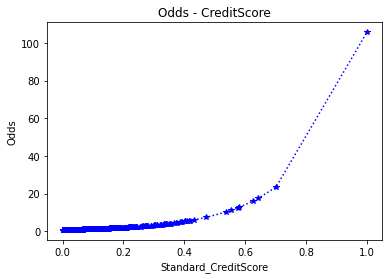

In [35]:
plt.plot(X2_plot,odds,"b:*")
plt.ylabel("Odds")
plt.xlabel("Standard_CreditScore")
plt.title("Odds - CreditScore")
plt.show()

<a id="2.3"> </a>
### 2.3 Deal vs Contact

In [51]:
## See if there is null value in column contact

data["highcontact"].value_counts(dropna=False)

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:336: RuntimeWarning: divide by zero encountered in invert
  return ~res
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:952: RuntimeWarning: divide by zero encountered in bitwise_and
  is_float_type = lib.map_infer(vals, is_float) & notna(vals)


False    2539
True     2461
Name: highcontact, dtype: int64

In [52]:
 ## create dummy valuables for contact
data = pd.get_dummies(data,columns=["highcontact"])


C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in bitwise_or
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\si

In [53]:
data["highcontact"] = data["highcontact_True"]

In [54]:
data["highcontact"].value_counts(dropna=False)

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


0    2539
1    2461
Name: highcontact, dtype: int64

In [55]:
X3 = np.array(data["highcontact"]).reshape(-1,1)
Y3 = data["deal"]

In [56]:
lg3 = LogisticRegression()
lg3.fit(X3,Y3)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:291: RuntimeWarning: divide by zero encountered in subtract
  imask = np.cumsum(mask) - 1
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\svm\base.py:902: RuntimeWarning: divide by zero encountered in multiply
  intercept_ = intercept_scaling * raw_coef_[:, -1]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
lg3.score(X3,Y3)

C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:308: RuntimeWarning: divide by zero encountered in add
  dense_output=True) + self.intercept_
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:326: RuntimeWarning: divide by zero encountered in greater
  indices = (scores > 0).astype(np.int)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:181: RuntimeWarning: divide by zero encountered in equal
  score = y_true == y_pred
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: divide by zero encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: divide by zero encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.5586

In [58]:
lg3.coef_

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:841: RuntimeWarning: divide by zero encountered in isfinite
  finite_vals = data[isfinite(data)]
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:844: RuntimeWarning: divide by zero encountered in not_equal
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:844: RuntimeWarning: divide by zero encountered in absolute
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:850: RuntimeWarning: divide by zero encountered in double_scalars
  (min_val < 0.0001 or max_val/min_val > 1000.)):
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:924: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(x):


array([[0.16685299]])

In [59]:
P_3 = lg3.predict_proba(X3)
P_3

C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:308: RuntimeWarning: divide by zero encountered in add
  dense_output=True) + self.intercept_
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:339: RuntimeWarning: divide by zero encountered in multiply
  prob *= -1
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: divide by zero encountered in exp
  np.exp(prob, prob)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:341: RuntimeWarning: divide by zero encountered in add
  prob += 1
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:342: RuntimeWarning: divide by zero encountered in reciprocal
  np.reciprocal(prob, prob)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:344: RuntimeWarning: divide by zero encountered in subtract
  return np.vstack([1 - prob, prob]).T
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:8

array([[0.5787771 , 0.4212229 ],
       [0.53765415, 0.46234585],
       [0.53765415, 0.46234585],
       ...,
       [0.53765415, 0.46234585],
       [0.53765415, 0.46234585],
       [0.53765415, 0.46234585]])

In [60]:
odds =[]
for i in range(len(P_3)):
    odds.append(P_3[i][1]/P_3[i][0])
odds

C:\Users\15161\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


[0.7277808710136152,
 0.8599317221576445,
 0.8599317221576445,
 0.7277808710136152,
 0.8599317221576445,
 0.7277808710136152,
 0.7277808710136152,
 0.7277808710136152,
 0.7277808710136152,
 0.8599317221576445,
 0.7277808710136152,
 0.8599317221576445,
 0.7277808710136152,
 0.8599317221576445,
 0.8599317221576445,
 0.7277808710136152,
 0.8599317221576445,
 0.8599317221576445,
 0.7277808710136152,
 0.8599317221576445,
 0.8599317221576445,
 0.7277808710136152,
 0.8599317221576445,
 0.8599317221576445,
 0.8599317221576445,
 0.8599317221576445,
 0.8599317221576445,
 0.8599317221576445,
 0.8599317221576445,
 0.7277808710136152,
 0.7277808710136152,
 0.8599317221576445,
 0.7277808710136152,
 0.7277808710136152,
 0.7277808710136152,
 0.7277808710136152,
 0.8599317221576445,
 0.8599317221576445,
 0.7277808710136152,
 0.7277808710136152,
 0.8599317221576445,
 0.7277808710136152,
 0.7277808710136152,
 0.7277808710136152,
 0.7277808710136152,
 0.7277808710136152,
 0.7277808710136152,
 0.7277808710

In [44]:
pd.Series(odds).describe()

count    5000.000000
mean        0.792636
std         0.066260
min         0.727408
25%         0.727408
50%         0.727408
75%         0.859931
max         0.859931
dtype: float64

In [67]:
X_contact = [0,1]
Y_Odds = [odds[0],odds[1]]

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\figure.py:356: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(figsize).all():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\gridspec.py:134: RuntimeWarning: divide by zero encountered in subtract
  fig_tops, fig_bottoms = (top - cell_hs).reshape((-1, 2)).T
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\gridspec.py:135: RuntimeWarning: divide by zero encountered in add
  fig_lefts, fig_rights = (left + cell_ws).reshape((-1, 2)).T
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: divide by zero encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: divide by zero encountered in

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\ticker.py:1938: RuntimeWarning: divide by zero encountered in int_scalars
  step = steps[istep - i]
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\ticker.py:1942: RuntimeWarning: divide by zero encountered in double_scalars
  best_vmin = (_vmin // step) * step
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\ticker.py:1944: RuntimeWarning: divide by zero encountered in double_scalars
  low = np.round(Base(step).le(_vmin - best_vmin) / step)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\ticker.py:1711: RuntimeWarning: divide by zero encountered in double_scalars
  if closeto(m / self._base, 1):  # was closeto(m, self._base)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\ticker.py:1688: RuntimeWarning: divide by zero encountered in double_scalars
  if abs(x - y) < 1e-10:
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\ticker.py:1714: RuntimeWarning: divide by zero encountered in double_scalars
  return

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:1921: RuntimeWarning: divide by zero encountered in double_scalars
  (x, bottom - self.labelpad * self.figure.dpi / 72.0)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:1951: RuntimeWarning: divide by zero encountered in double_scalars
  (x, bottom - self.OFFSETTEXTPAD * self.figure.dpi / 72.0)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2225: RuntimeWarning: divide by zero encountered in double_scalars
  ptp = transinv.transform_point((pix[0], pix[1] + perturb))
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2226: RuntimeWarning: divide by zero encountered in double_scalars
  dy = abs(ptp[1] - where)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\text.py:376: RuntimeWarning: divide by zero encountered in double_scalars
  offsetx = (xmin + width)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\text.py:387: RuntimeWarning: divide by zero encountered in double_scalar

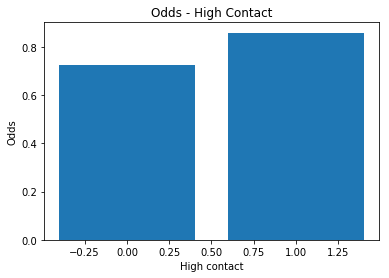

In [71]:
## not useful,only value < 1 means with only high contact, no matter what its value is it will predict it as not a fail deal
plt.bar(X_contact, Y_Odds)
plt.ylabel("Odds")
plt.xlabel("High contact")
plt.title("Odds - High Contact")
plt.show()

In [46]:
data['credit_score']

0        53.119077
1         1.000000
2         3.000000
3       161.000000
4        29.000000
           ...    
4995    146.000000
4996     17.000000
4997     11.000000
4998     53.119077
4999      9.000000
Name: credit_score, Length: 5000, dtype: float64

<a id="2.4"> </a>
## 2.4 Logist regression with multiple variables

In [73]:
data.corr()["deal"].sort_values()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\frame.py:6507: RuntimeWarning: divide by zero encountered in isfinite
  correl = libalgos.nancorr(_ensure_float64(mat), minp=min_periods)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\151

tencentscore         -0.213409
gaodescore           -0.105925
instalments_amount   -0.096088
id                   -0.071709
apply_request_sum    -0.065933
apply_reject_sum     -0.062687
age                  -0.056150
highcontact_False    -0.041664
loan_offer_sum       -0.032331
areaid               -0.031990
provincecode         -0.031802
repay_fail_sum       -0.019168
instalments_num      -0.004299
taobaodealno          0.002084
numbercontacttotal    0.005232
numbercontact20s      0.018830
numbercontact         0.022857
delaydate_max         0.025641
max_default_days      0.035355
highcontact20s        0.035964
yuebaobalance         0.040148
alipaybalance         0.040259
highcontact_True      0.041664
highcontact           0.041664
birthday              0.056075
gender                0.076812
credit_score          0.116620
credit_reg            0.128184
creditlevelasbuyer    0.129605
nominalrates          0.131284
uid                   0.215884
huabeibalance         0.231817
huabeiam

In [48]:
## take variables: tencent score,gaodescore,apptime,huabeiamount,huabeibalance,nominalrates,credit_score

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uid                    5000 non-null   int64  
 1   id                     5000 non-null   int64  
 2   provincecode           5000 non-null   int64  
 3   birthday               5000 non-null   int64  
 4   age                    5000 non-null   int64  
 5   gender                 5000 non-null   bool   
 6   areaid                 5000 non-null   int64  
 7   provincename           3164 non-null   object 
 8   cityname               3163 non-null   object 
 9   areaname               3163 non-null   object 
 10  instalments_num        5000 non-null   int64  
 11  instalments_amount     5000 non-null   int64  
 12  shop_address           5000 non-null   object 
 13  trans_date             4996 non-null   object 
 14  taobaostartdate        3794 non-null   object 
 15  taob

In [74]:
data["nominalrates"][data["nominalrates"].isnull()] = data["nominalrates"].mean()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:336: RuntimeWarning: divide by zero encountered in invert
  return ~res
C:\Users\15161\Anaconda3\lib\site-pac

In [75]:
Y = data["deal"]
X = data[["apptimes","huabeiamount","huabeibalance","nominalrates","credit_score","tencentscore","gaodescore"]]


C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in bitwise_or
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\si

In [76]:
lg4 = LogisticRegression()
lg4.fit(X,Y)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:291: RuntimeWarning: divide by zero encountered in subtract
  imask = np.cumsum(mask) - 1
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\svm\base.py:902: RuntimeWarning: divide by zero encountered in multiply


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
lg4.score(X,Y)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:308: RuntimeWarning: divide by zero encountered in add
  dense_output=True) + self.intercept_
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:326: RuntimeWarning: divide by zero encountered in greater
  indices = (scores > 0).astype(np.int)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero en

0.7068

In [78]:
lg4.coef_[0]

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:841: RuntimeWarning: divide by zero encountered in isfinite
  finite_vals = data[isfinite(data)]
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:844: RuntimeWarning: divide by zero encountered in not_equal
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:844: RuntimeWarning: divide by zero encountered in absolute
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: divide by zero encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:924: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(x):


array([ 1.04654145e+00,  7.08939951e-05,  4.36422004e-04,  1.59863435e-01,
       -3.96285206e-05, -3.15271103e-02, -1.17349756e-02])

In [79]:
coef = lg4.coef_[0]
importance = abs(coef)
importance =  (importance/importance.max())

C:\Users\15161\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in absolute
  
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: divide by zero encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
index = ["apptimes","huabeiamount","huabeibalance","nominalrates","credit_score","tencentscore","gaodescore"]

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\figure.py:356: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(figsize).all():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\gridspec.py:134: RuntimeWarning: divide by zero encountered in subtract
  fig_tops, fig_bottoms = (top - cell_hs).reshape((-1, 2)).T
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\gridspec.py:135: RuntimeWarning: divide by zero encountered in add
  fig_lefts, fig_rights = (left + cell_ws).reshape((-1, 2)).T
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: divide by zero encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: divide by zero encountered in

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:1858: RuntimeWarning: divide by zero encountered in double_scalars
  dx = abs(ptp[0] - where)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:1090: RuntimeWarning: divide by zero encountered in isnan
  if np.isnan(ds1):
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:1100: RuntimeWarning: divide by zero encountered in isnan
  if np.isnan(ds2):
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:1102: RuntimeWarning: divide by zero encountered in double_scalars
  interval_expanded = (interval_expanded[0] - ds1,
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:1103: RuntimeWarning: divide by zero encountered in double_scalars
  interval_expanded[1] + ds2)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\text.py:330: RuntimeWarning: divide by zero encountered in double_scalars
  ymax = horizLayout[0][1] + horizLayout[0][3]
C:\Users\15161\Anaconda3\lib\site-packages\matplot

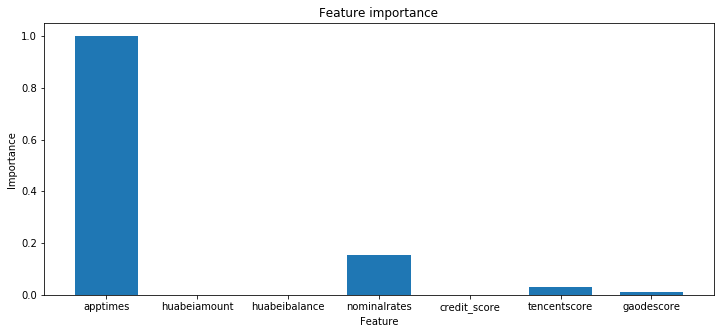

In [84]:
plt.figure(figsize=[12, 5])
plt.bar(index,importance,width=0.7)
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.title("Feature importance")

plt.show()

In [76]:
data.corr()["apptimes"].sort_values()

id                   -0.151790
highcontact_False    -0.127804
tencentscore         -0.068489
max_default_days     -0.059736
age                  -0.040922
uid                  -0.036182
instalments_amount   -0.023859
gaodescore           -0.012016
yuebaobalance        -0.001816
gender                0.001985
areaid                0.005894
provincecode          0.006104
alipaybalance         0.014274
instalments_num       0.014320
loan_offer_sum        0.016115
huabeibalance         0.025768
repay_fail_sum        0.026974
credit_score          0.028913
creditlevelasbuyer    0.031294
huabeiamount          0.033045
apply_reject_sum      0.039026
birthday              0.040825
apply_request_sum     0.043497
nominalrates          0.061899
numbercontacttotal    0.070455
delaydate_max         0.079056
highcontact20s        0.126409
highcontact           0.127804
highcontact_True      0.127804
deal                  0.237908
taobaodealno          0.368402
numbercontact20s      0.404202
numberco

In [84]:
Y = data["deal"]
X = data[["apptimes","huabeibalance","nominalrates","credit_score","tencentscore","gaodescore","gender"]]
lg = LogisticRegression()
lg.fit(X,Y)
lg.score(X,Y)

0.7096

In [85]:
lg4.coef_[0]

array([ 1.18021588e+00,  6.59119053e-05,  4.39638322e-04,  1.37616783e-01,
       -1.23521099e-04, -3.46274704e-02,  9.37269120e-03])

In [ ]:
1.18021588e+00,  6.59119053e-05,  4.39638322e-04,  1.37616783e-01,
       -1.23521099e-04, -3.46274704e-02,  9.37269120e-03

In [88]:
data.corr()["credit_score"].sort_values()

tencentscore         -0.170965
gaodescore           -0.133872
areaid               -0.072999
provincecode         -0.072480
uid                  -0.058996
age                  -0.046047
max_default_days     -0.038391
delaydate_max        -0.027854
instalments_num      -0.017872
highcontact_False    -0.017035
nominalrates          0.005417
id                    0.006162
highcontact_True      0.017035
highcontact           0.017035
highcontact20s        0.020100
apptimes              0.028913
yuebaobalance         0.031838
alipaybalance         0.033804
numbercontact20s      0.039533
taobaodealno          0.043932
birthday              0.046051
numbercontact         0.046830
apply_reject_sum      0.054332
apply_request_sum     0.063123
numbercontacttotal    0.080546
instalments_amount    0.089846
deal                  0.116620
repay_fail_sum        0.130759
loan_offer_sum        0.154193
gender                0.195363
huabeibalance         0.277297
huabeiamount          0.478334
credit_s

In [87]:
data.corr()["gaodescore"].sort_values()

huabeiamount         -0.209540
age                  -0.195603
huabeibalance        -0.159380
creditlevelasbuyer   -0.152636
credit_score         -0.133872
deal                 -0.105925
loan_offer_sum       -0.060457
repay_fail_sum       -0.051138
gender               -0.042513
numbercontacttotal   -0.042487
nominalrates         -0.035584
yuebaobalance        -0.032744
alipaybalance        -0.028977
numbercontact20s     -0.028726
numbercontact        -0.028267
highcontact_False    -0.022469
instalments_num      -0.016450
taobaodealno         -0.014724
instalments_amount   -0.013447
apptimes             -0.012016
max_default_days      0.016305
highcontact           0.022469
highcontact_True      0.022469
highcontact20s        0.028814
apply_request_sum     0.032541
delaydate_max         0.050073
uid                   0.051218
apply_reject_sum      0.059659
tencentscore          0.112779
id                    0.113125
provincecode          0.120738
areaid                0.120951
birthday